In [1]:
# Scientific imports

%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astroquery.mast import Observations
from astroquery.mast import Catalogs

# General imports

import csv, math, os, os.path, sys
import pandas as pd
import seaborn as sb
from sklearn import metrics
from IPython.display import display
sb.set()

# File imports

import data_header_check
import header_check

In [2]:
fitsList = []
fits_directories = [x[0] for x in os.walk('.')]

for fits_root, fits_dirs, fits_files in os.walk('.'):
    for fits_file in fits_files:
        fullpath = os.path.join(fits_root, fits_file)
        if (os.path.splitext(fullpath.lower())[1]).endswith('.fits'):
            fitsList.append(fullpath)
print("Number of FITS files: {}".format(len(fitsList)))

Number of FITS files: 28


In [3]:
def makeNewPlot(file, fluxParam):
    with fits.open(file, mode="readonly") as hdulist:

        times = hdulist[1].data['TIME']
        fluxes_init = hdulist[1].data[fluxParam]

        # Time to get a bit more modular!
        objName = hdulist[0].header['OBJECT']

     # Start figure and axis.
    fig, ax = plt.subplots(figsize=(20,8)) 

    # Plot the detrended fluxes as black circles.  We will plot them in sorted order.
    ax.plot(times, fluxes_init, 'ko',
           markersize=2)

    # Let's label the axes and define a title for the figure.
    fig.suptitle(objName + ' - Folded Lightcurve And Transit Model.')
    ax.set_ylabel("Flux (relative)")
    ax.set_xlabel("Time")

    plt.show()

In [5]:
# Let's make a list of ONLY light curves taken by the TESS mission

tessList = [fitsList[i] for i in range(len(fitsList)) if fits.getheader(fitsList[i])['TELESCOP'] == 'TESS']

In [6]:
fits.getdata(tessList[0]).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_INIT_ERR'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_DETREND'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
)

In [8]:
for i in tessList:
    print(fits.getdata(i).columns)

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_INIT_ERR'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_DETREND'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
)
ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '165J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,15)'
    name = 'FLUX'; format = '165E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,15)'
    name = 'FLUX_ERR'; format = '165E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,15)'
    name = 'FLUX_BKG'; format = '165E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,15)'
    name = 'FLUX_BKG_ERR'; format = '165E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,15)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)
ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)


In [19]:
len(fits.getdata(tessList[2])["FLUX"])

20076

In [29]:
X = fits.getdata(tessList[2])["FLUX"]
len(X)

20076

In [30]:
X.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

Not... Not the route I wanted to use to work out the Type of X, BUUUUUT..... it *did* tell me, so, uh, I'll take that as a win!

In [35]:
Y=X.flatten()
Y

array([-14.189615, -10.469687, -11.41046 , ...,        nan,        nan,
              nan], dtype=float32)

In [38]:
Y
len(Y)

2870868

Ooh... so WAAAAY more entries than the previous ones... Though not surprising, I flattened a 20076 long array of (11x13) entries, and 11 x 13 x 20076 = 2870868 so yeah.

In [39]:
X[0]

array([[-1.41896152e+01, -1.04696875e+01, -1.14104605e+01,
        -9.46405602e+00, -5.08352995e+00,  1.52171745e+01,
         6.69684219e+01,  1.08379456e+02,  4.84799690e+01,
         1.30540533e+01, -2.36588287e+00],
       [-1.47724400e+01, -1.34225559e+01, -1.02127953e+01,
        -9.54971027e+00, -1.69542097e-02,  4.36504631e+01,
         2.38461365e+02,  5.00038513e+02,  1.97814499e+02,
         6.38863297e+01,  6.88003922e+00],
       [-9.90285110e+00, -9.01975250e+00, -9.79224777e+00,
        -6.60969639e+00,  1.23421307e+01,  9.10934219e+01,
         4.22940918e+02,  2.25286255e+03,  8.27042603e+02,
         1.31436386e+02,  2.15932827e+01],
       [-1.25084562e+01, -1.16483335e+01, -5.55445623e+00,
         5.65930510e+00,  5.97271652e+01,  1.65931442e+02,
         5.14677063e+02,  2.99670972e+03,  1.00496869e+03,
         1.34466827e+02,  2.33073425e+01],
       [-1.16163158e+01, -3.76080346e+00,  5.64200163e+00,
         6.55886383e+01,  2.08883652e+02,  4.19172638e+02,
  

Can I just... take the average?

In [46]:
Z = [0]*len(X)
len(Z)

20076

In [47]:
type(X[0])

numpy.ndarray

In [61]:
for i in range(len(X)):
    Z[i] = X[i][0]

In [62]:
len(Z)

20076

In [81]:
np.sum(X[i][0])

199.11581

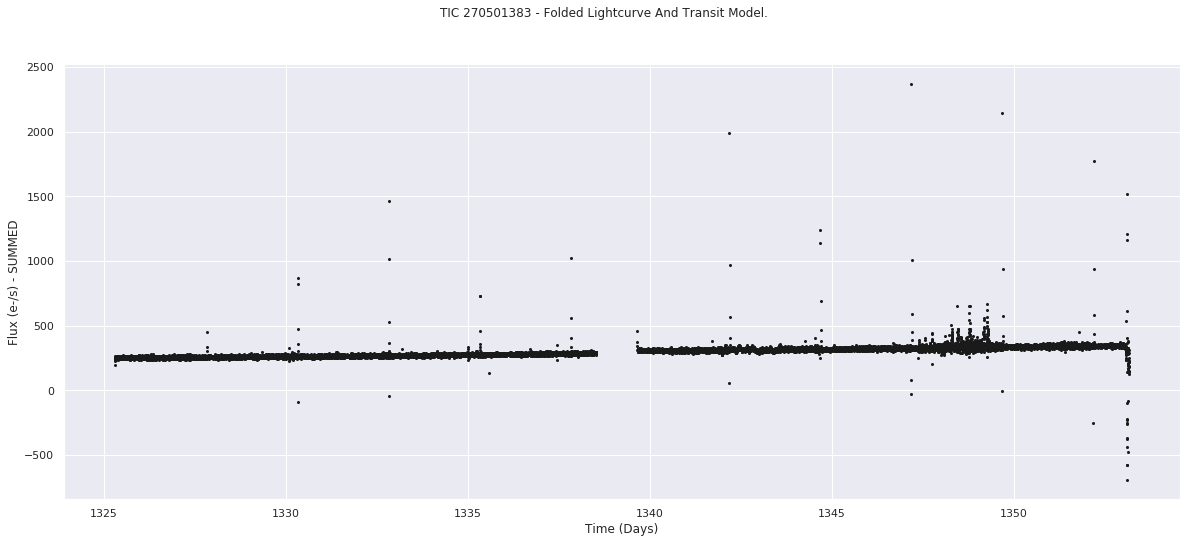

In [90]:
#makeNewPlot(tessList[2], "FLUX")
Z = [0]*len(X)
for i in range(len(X)):
    Z[i] = np.sum(X[i][0])

with fits.open(tessList[2], mode="readonly") as hdulist:

    times = hdulist[1].data['TIME']
    fluxes_init = Z

    # Time to get a bit more modular!
    objName = hdulist[0].header['OBJECT']

# Start figure and axis.
fig, ax = plt.subplots(figsize=(20,8)) 

# Plot the detrended fluxes as black circles.  We will plot them in sorted order.
ax.plot(times, fluxes_init, 'ko',
       markersize=2)

# Let's label the axes and define a title for the figure.
fig.suptitle(objName + ' - Folded Lightcurve And Transit Model.')
ax.set_ylabel("Flux (e-/s) - SUMMED")
ax.set_xlabel("Time (Days)")

plt.show()

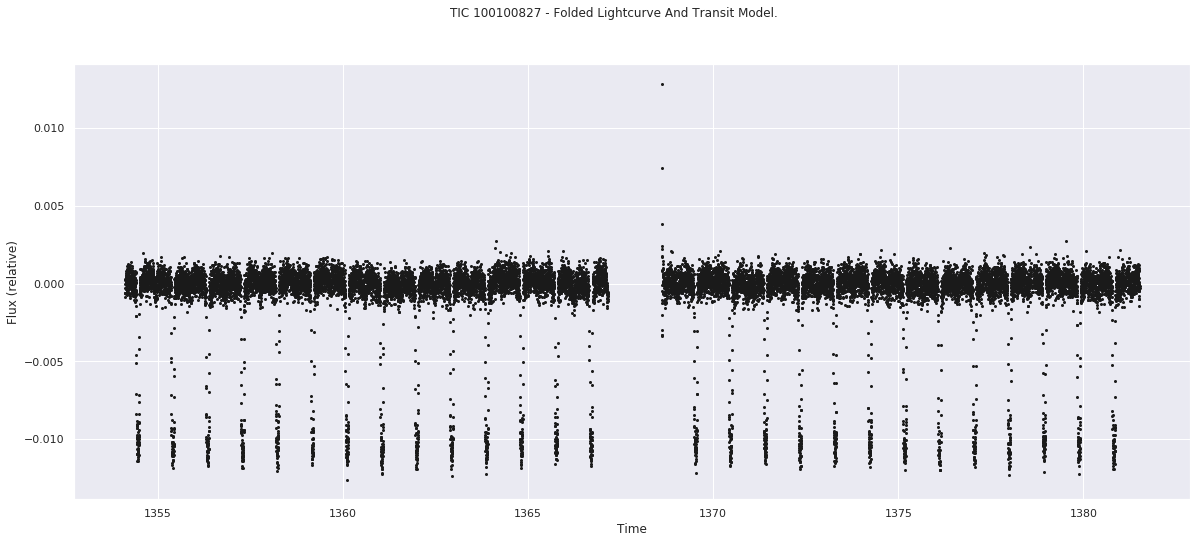

In [52]:
makeNewPlot(tessList[0], "LC_INIT")

In [85]:
tessList[2]

'./mastDownload/TESS/tess2018206045859-s0001-0000000270501383-0120-s/tess2018206045859-s0001-0000000270501383-0120-s_tp.fits'